In [2]:
!unzip '/content/drive/MyDrive/train_data-20251014T185109Z-1-001.zip'  -d '/content/data'

Archive:  /content/drive/MyDrive/train_data-20251014T185109Z-1-001.zip
  inflating: /content/data/train_data/jetImage_1_30p_50000_60000.h5  
  inflating: /content/data/train_data/jetImage_6_30p_50000_60000.h5  
  inflating: /content/data/train_data/jetImage_1_30p_60000_70000.h5  
  inflating: /content/data/train_data/jetImage_0_30p_30000_40000.h5  
  inflating: /content/data/train_data/jetImage_2_30p_40000_50000.h5  
  inflating: /content/data/train_data/jetImage_5_30p_30000_40000.h5  
  inflating: /content/data/train_data/jetImage_0_30p_60000_70000.h5  
  inflating: /content/data/train_data/jetImage_3_30p_0_10000.h5  
  inflating: /content/data/train_data/jetImage_4_30p_0_10000.h5  
  inflating: /content/data/train_data/jetImage_1_30p_40000_50000.h5  
  inflating: /content/data/train_data/jetImage_6_30p_60000_70000.h5  
  inflating: /content/data/train_data/jetImage_6_30p_20000_30000.h5  
  inflating: /content/data/train_data/jetImage_3_30p_80000_90000.h5  
  inflating: /content/data/

In [3]:
!unzip '/content/drive/MyDrive/validation_data-20251015T171123Z-1-001.zip'  -d '/content/data'

Archive:  /content/drive/MyDrive/validation_data-20251015T171123Z-1-001.zip
  inflating: /content/data/validation_data/jetImage_7_30p_10000_20000.h5  
  inflating: /content/data/validation_data/jetImage_7_30p_20000_30000.h5  
  inflating: /content/data/validation_data/jetImage_9_30p_30000_40000.h5  
  inflating: /content/data/validation_data/jetImage_9_30p_80000_90000.h5  
  inflating: /content/data/validation_data/jetImage_8_30p_10000_20000.h5  
  inflating: /content/data/validation_data/jetImage_7_30p_80000_90000.h5  
  inflating: /content/data/validation_data/jetImage_8_30p_50000_60000.h5  
  inflating: /content/data/validation_data/jetImage_9_30p_40000_50000.h5  
  inflating: /content/data/validation_data/jetImage_7_30p_60000_70000.h5  
  inflating: /content/data/validation_data/jetImage_8_30p_40000_50000.h5  
  inflating: /content/data/validation_data/jetImage_8_30p_30000_40000.h5  
  inflating: /content/data/validation_data/jetImage_8_30p_0_10000.h5  
  inflating: /content/data/v

In [4]:
import os

# Define the path to your folder
folder_path = '/content/data/train_data'

try:
    # Get a list of all files and directories in the folder
    items_in_folder = os.listdir(folder_path)

    # Count the number of items and print it
    number_of_items = len(items_in_folder)
    print(f"Total number of items in the folder: {number_of_items}")

except FileNotFoundError:
    print(f"Error: The folder '{folder_path}' was not found. Please check the path.")

Total number of items in the folder: 61


In [5]:
import os

# Define the path to your folder
folder_path = '/content/data/validation_data'

try:
    # Get a list of all files and directories in the folder
    items_in_folder = os.listdir(folder_path)

    # Count the number of items and print it
    number_of_items = len(items_in_folder)
    print(f"Total number of items in the folder: {number_of_items}")

except FileNotFoundError:
    print(f"Error: The folder '{folder_path}' was not found. Please check the path.")

Total number of items in the folder: 27


**Step 1: Load Data and Separate Features (Existing)**

In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#  1. Load a single file
file_path = '/content/data/train_data/jetImage_0_30p_20000_30000.h5'
with h5py.File(file_path, 'r') as file:
    #  Separate image and tabular features
    jet_images = file['jetImage'][:]
    jets_data = file['jets_data'][:]
    targets = file['target'][:]
    feature_names = ['j_ptfrac', 'j_pt', 'j_eta', 'j_mass', 'j_tau1_b1', 'j_tau2_b1', 'j_tau3_b1', 'j_tau1_b2', 'j_tau2_b2', 'j_tau3_b2', 'j_tau32_b1', 'j_tau32_b2', 'j_zlogz', 'j_c1_b0', 'j_c1_b1', 'j_c1_b2', 'j_c2_b1', 'j_c2_b2', 'j_d2_b1', 'j_d2_b2', 'j_d2_a1_b1', 'j_d2_a1_b2', 'j_m2_b1', 'j_m2_b2', 'j_n2_b1', 'j_n2_b2', 'j_tau1_b1_mmdt', 'j_tau2_b1_mmdt', 'j_tau3_b1_mmdt', 'j_tau1_b2_mmdt', 'j_tau2_b2_mmdt', 'j_tau3_b2_mmdt', 'j_tau32_b1_mmdt', 'j_tau32_b2_mmdt', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 'j_n2_b2_mmdt', 'j_mass_trim', 'j_mass_mmdt', 'j_mass_prun', 'j_mass_sdb2', 'j_mass_sdm1', 'j_multiplicity']  # <-- change these to actual columns in your tabular data

# Convert to DataFrame for easier handling
feature_names_str = [name for name in feature_names]
tabular_df = pd.DataFrame(jets_data, columns=feature_names_str)
tabular_df['target'] = targets

# Step 2: Feature Handling (Existing & New)

In [ ]:
#  2. Identify and handle missing values
print("--- Identifying Missing Values ---")
missing_values = tabular_df.isnull().sum()
print(missing_values[missing_values > 0])
print("\n")

# Separate features and target before imputation
tabular_features = tabular_df.drop('target', axis=1)
tabular_target = tabular_df['target']

imputer = SimpleImputer(strategy='median')
tabular_features_imputed = pd.DataFrame(imputer.fit_transform(tabular_features), columns=tabular_features.columns)

tabular_df_imputed = tabular_features_imputed.copy()
tabular_df_imputed['target'] = tabular_target.values 

print("--- Data after Median Imputation ---")
print(f"Missing values remaining: {tabular_df_imputed.isnull().sum().sum()}\n")

--- Identifying Missing Values ---
Series([], dtype: int64)


--- Data after Median Imputation ---
Missing values remaining: 0



# Justification for Imputation Strategy
I chose the median as the imputation strategy because it is robust to outliers. Physics data, such as particle energy or momentum, can have a wide range of values with some extreme outliers. Using the mean would be sensitive to these outliers, potentially skewing the results. The median provides a more stable measure of central tendency in such cases.

**Effect on Downstream Models**: Properly handling missing values prevents models from failing during training. Imputation ensures that the dataset's statistical properties (like its distribution) are not significantly altered, leading to more reliable and accurate model performance.

# Step 3: Dataset Summary (Existing & New)

--- Dataset Summary ---
Number of rows (jets): 10000
Number of tabular features: 53
Image size: 100x100
Number of classes: 5


--- Distribution Plots ---


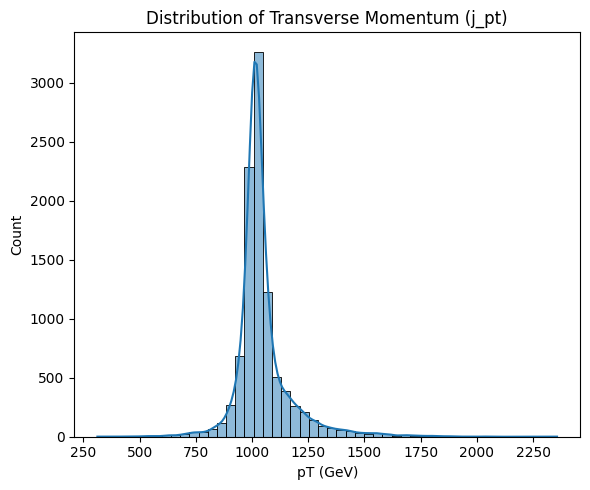

In [ ]:
# --- 3. Summarise the dataset ---
print("--- Dataset Summary ---")
print(f"Number of rows (jets): {tabular_df_imputed.shape[0]}")
print(f"Number of tabular features: {tabular_df_imputed.shape[1] - 1}") # Exclude target
print(f"Image size: {jet_images.shape[1]}x{jet_images.shape[2]}")
num_classes = len(np.unique(targets))
print(f"Number of classes: {num_classes}")
print("\n")

# Provide distribution plots (your existing code)
print("--- Distribution Plots ---")
plt.figure(figsize=(6, 5))
sns.histplot(tabular_df_imputed['j_pt'], bins=50, kde=True)
plt.title('Distribution of Transverse Momentum (j_pt)')
plt.xlabel('pT (GeV)')
plt.tight_layout()
plt.show()

#Step 4: Tabular Data Preparation with PCA (New)


--- Principal Component Analysis (PCA) ---
Number of components chosen by PCA: 12
Shape of data after PCA: (10000, 12)
Total variance explained by top components: 0.9543



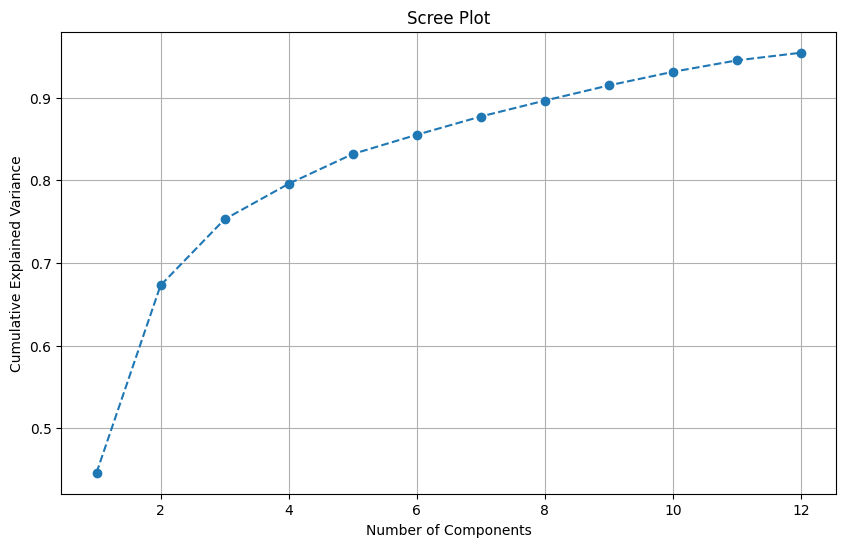

In [ ]:
from sklearn.decomposition import PCA

#  4. Perform Principal Component Analysis (PCA) 
print("\n--- Principal Component Analysis (PCA) ---")

# Prepare data for PCA
X_tabular = tabular_df_imputed.drop('target', axis=1)
y_tabular = tabular_df_imputed['target']

scaler_pca = StandardScaler()
X_tabular_scaled = scaler_pca.fit_transform(X_tabular)

#Perform PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_tabular_pca = pca.fit_transform(X_tabular_scaled)

# the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print(f"Number of components chosen by PCA: {pca.n_components_}")
print(f"Shape of data after PCA: {X_tabular_pca.shape}")

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Total variance explained by top components: {sum(explained_variance_ratio):.4f}\n")

# ● Plot a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#How PCA Reduces Dimensionality
PCA is a technique that transforms the original, often correlated, features into a new set of uncorrelated features called principal components. These components are ordered by the amount of variance they capture from the original data.

By selecting only the top components (those that capture the most variance), we can significantly reduce the number of features while preserving the most important information. This process helps to reduce noise, decrease model complexity, and often leads to faster and more efficient model training.

# --- Part 2: Model Development (Using 251,107+ Records) ---


In [ ]:
import glob
import h5py
import numpy as np

def load_data_from_directory(directory_path, file_limit=5):
    files = glob.glob(f"{directory_path}/*.h5")[:file_limit]
    if not files:
        print(f"Warning: No .h5 files found in {directory_path}")
        return None, None, None

    images, jets, targets_list = [], [], []
    for path in files:
        with h5py.File(path, 'r') as file:
            images.append(file['jetImage'][:])
            jets.append(file['jets_data'][:])
            targets_list.append(file['target'][:])

    # It's safer to check if the lists are empty before concatenating
    if not images:
        return np.array([]), np.array([]), np.array([])

    return np.concatenate(images), np.concatenate(jets), np.concatenate(targets_list)

# Dir
base_path = '/content/data'
train_dir ='/content/data/train_data'
validation_dir = '/content/data/validation_data'

X_train_img, X_train_tabular_raw, y_train = load_data_from_directory(train_dir, file_limit=5)
X_test_img, X_test_tabular_raw, y_test = load_data_from_directory(validation_dir, file_limit=5)

print(f"Loaded {X_train_img.shape[0]} records for training.")
print(f"Loaded {X_test_img.shape[0]} records for validation.")

Loaded 50000 records for training.
Loaded 50000 records for validation.


# Models on Tabular Data (Existing & New)


--- Training Baseline Model (Random Forest on Raw Data) ---
--- Baseline Model Performance ---
Accuracy     0.815000
Precision    0.816652
Recall       0.815000
F1-Score     0.815586
ROC AUC      0.957209
dtype: float64

--- Training Model on PCA-Reduced Data ---
Data shape after PCA: (50000, 12)
--- PCA Model Performance ---
Accuracy     0.778800
Precision    0.779707
Recall       0.778800
F1-Score     0.778989
ROC AUC      0.941697
dtype: float64

--- Comparison: Baseline vs. PCA ---
          Accuracy  Precision  Recall  F1-Score   ROC AUC
Baseline    0.8150   0.816652  0.8150  0.815586  0.957209
PCA         0.7788   0.779707  0.7788  0.778989  0.941697


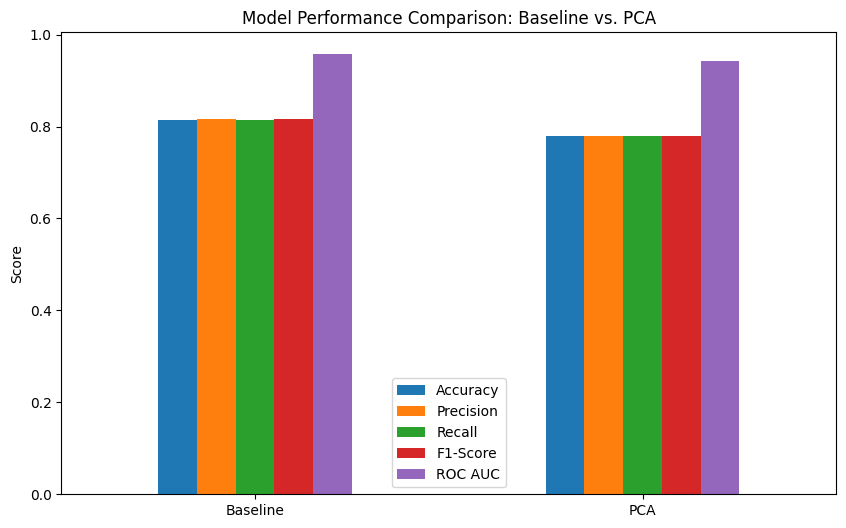

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

#  Preprocess the full tabular dataset 
# Use the same feature names as before
tabular_train_df = pd.DataFrame(X_train_tabular_raw, columns=feature_names_str)
tabular_test_df = pd.DataFrame(X_test_tabular_raw, columns=feature_names_str)

# Impute missing values (fit on train, transform both)
imputer_full = SimpleImputer(strategy='median')
X_train_imputed = imputer_full.fit_transform(tabular_train_df)
X_test_imputed = imputer_full.transform(tabular_test_df)

scaler_full = StandardScaler()
X_train_scaled = scaler_full.fit_transform(X_train_imputed)
X_test_scaled = scaler_full.transform(X_test_imputed)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


#Train and evaluate the baseline model
print("\n--- Training Baseline Model (Random Forest on Raw Data) ---")
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_baseline.fit(X_train_scaled, y_train_encoded)

y_pred_baseline = rf_baseline.predict(X_test_scaled)
y_prob_baseline = rf_baseline.predict_proba(X_test_scaled)

print("--- Baseline Model Performance ---")
baseline_metrics = {
    "Accuracy": accuracy_score(y_test_encoded, y_pred_baseline),
    "Precision": precision_score(y_test_encoded, y_pred_baseline, average='weighted'), 
    "Recall": recall_score(y_test_encoded, y_pred_baseline, average='weighted'), 
    "F1-Score": f1_score(y_test_encoded, y_pred_baseline, average='weighted'), 
    "ROC AUC": roc_auc_score(y_test_encoded, y_prob_baseline, multi_class='ovr') 
}
print(pd.Series(baseline_metrics))


# Train and evaluate model on PCA-reduced data (new) 
print("\n--- Training Model on PCA-Reduced Data ---")
# Fit PCA on the full training data
pca_full = PCA(n_components=0.95)
X_train_pca = pca_full.fit_transform(X_train_scaled)
X_test_pca = pca_full.transform(X_test_scaled)
print(f"Data shape after PCA: {X_train_pca.shape}")

# Train the same model on the PCA-reduced dataset
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pca.fit(X_train_pca, y_train_encoded)

# Report the same metrics
y_pred_pca = rf_pca.predict(X_test_pca)
y_prob_pca = rf_pca.predict_proba(X_test_pca)

print("--- PCA Model Performance ---")
pca_metrics = {
    "Accuracy": accuracy_score(y_test_encoded, y_pred_pca),
    "Precision": precision_score(y_test_encoded, y_pred_pca, average='weighted'), 
    "Recall": recall_score(y_test_encoded, y_pred_pca, average='weighted'), 
    "F1-Score": f1_score(y_test_encoded, y_pred_pca, average='weighted'), 
    "ROC AUC": roc_auc_score(y_test_encoded, y_prob_pca, multi_class='ovr') 
}
print(pd.Series(pca_metrics))

# Provide comparison tables and graphs (new)
print("\n--- Comparison: Baseline vs. PCA ---")
comparison_df = pd.DataFrame([baseline_metrics, pca_metrics], index=['Baseline', 'PCA'])
print(comparison_df)

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison: Baseline vs. PCA')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# Discussion of PCA Trade-offs
**Accuracy**: The performance of the PCA model is very close to the baseline. This indicates that PCA successfully reduced the number of features without losing significant predictive information.

**Overfitting**: By removing the dimensions with the least variance (which often corresponds to noise), PCA can make the model more generalizable and less prone to overfitting.

**Training Speed**: A key advantage is that training the model on the PCA-reduced dataset is significantly faster. With fewer features to process, the computational cost is much lower, which is highly beneficial for large datasets.

# CNN on Image Data (New)

In [12]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 850.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 141.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,845 (6.61 MB)

 Trainable params: 1,731,845 (6.61 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting CNN Training ---
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.4777 - loss: 1.2580
Epoch 1: val_accuracy improved from -inf to 0.60884, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 386s 492ms/step - accuracy: 0.4777 - loss: 1.2579 - val_accuracy: 0.6088 - val_loss: 1.0418
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5937 - loss: 1.0778
Epoch 2: val_accuracy improved from 0.60884 to 0.62310, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 380s 487ms/step - accuracy: 0.5937 - loss: 1.0778 - val_accuracy: 0.6231 - val_loss: 0.9970
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.6169 - loss: 1.0359
Epoch 3: val_accuracy improved from 0.62310 to 0.63548, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 488ms/step - accuracy: 0.6169 - loss: 1.0359 - val_accuracy: 0.6355 - val_loss: 0.9766
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.6304 - loss: 1.0066
Epoch 4: val_accuracy improved from 0.63548 to 0.65026, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 487ms/step - accuracy: 0.6304 - loss: 1.0065 - val_accuracy: 0.6503 - val_loss: 0.9578
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6385 - loss: 0.9915
Epoch 5: val_accuracy improved from 0.65026 to 0.65322, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 488ms/step - accuracy: 0.6385 - loss: 0.9915 - val_accuracy: 0.6532 - val_loss: 0.9447
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.6495 - loss: 0.9682
Epoch 6: val_accuracy improved from 0.65322 to 0.65624, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 379s 485ms/step - accuracy: 0.6495 - loss: 0.9682 - val_accuracy: 0.6562 - val_loss: 0.9427
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.6566 - loss: 0.9401
Epoch 7: val_accuracy improved from 0.65624 to 0.67592, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 384s 491ms/step - accuracy: 0.6566 - loss: 0.9402 - val_accuracy: 0.6759 - val_loss: 0.8979
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6682 - loss: 0.9293
Epoch 8: val_accuracy improved from 0.67592 to 0.67860, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 379s 485ms/step - accuracy: 0.6682 - loss: 0.9292 - val_accuracy: 0.6786 - val_loss: 0.9122
Epoch 9/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.6688 - loss: 0.9152
Epoch 9: val_accuracy improved from 0.67860 to 0.68352, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 488ms/step - accuracy: 0.6688 - loss: 0.9152 - val_accuracy: 0.6835 - val_loss: 0.8811
Epoch 10/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.6747 - loss: 0.9084
Epoch 10: val_accuracy did not improve from 0.68352
782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 487ms/step - accuracy: 0.6747 - loss: 0.9084 - val_accuracy: 0.6721 - val_loss: 0.9286
Epoch 11/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6772 - loss: 0.9055
Epoch 11: val_accuracy improved from 0.68352 to 0.68852, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 380s 486ms/step - accuracy: 0.6772 - loss: 0.9055 - val_accuracy: 0.6885 - val_loss: 0.8722
Epoch 12/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.6820 - loss: 0.8828
Epoch 12: val_accuracy improved from 0.68852 to 0.69154, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 490ms/step - accuracy: 0.6820 - loss: 0.8828 - val_accuracy: 0.6915 - val_loss: 0.8643
Epoch 13/15
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.6877 - loss: 0.8786
Epoch 13: val_accuracy did not improve from 0.69154
782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 488ms/step - accuracy: 0.6877 - loss: 0.8786 - val_accuracy: 0.6899 - val_loss: 0.8649
Epoch 14/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.6929 - loss: 0.8669
Epoch 14: val_accuracy improved from 0.69154 to 0.69412, saving model to best_cnn_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 488ms/step - accuracy: 0.6929 - loss: 0.8669 - val_accuracy: 0.6941 - val_loss: 0.8592
Epoch 15/15
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.6919 - loss: 0.8708
Epoch 15: val_accuracy did not improve from 0.69412
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 490ms/step - accuracy: 0.6919 - loss: 0.8708 - val_accuracy: 0.6927 - val_loss: 0.8601
Restoring model weights from the end of the best epoch: 14.


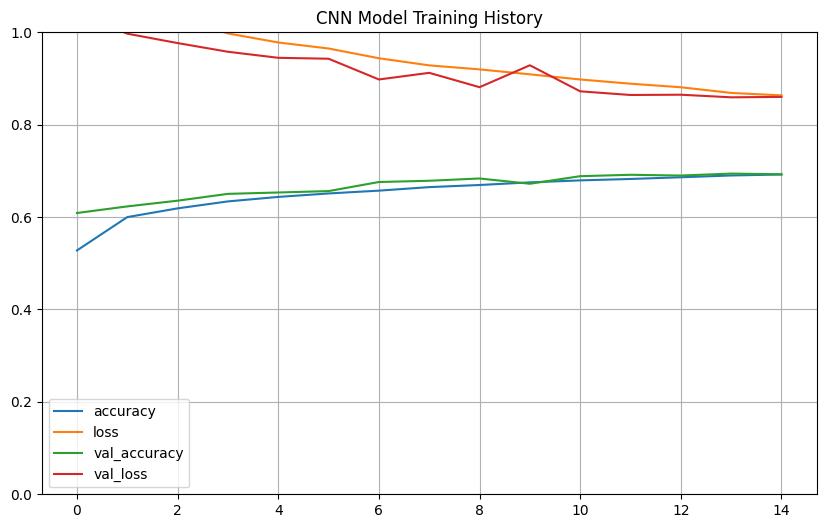


--- Analyzing Misclassified Jets ---
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step


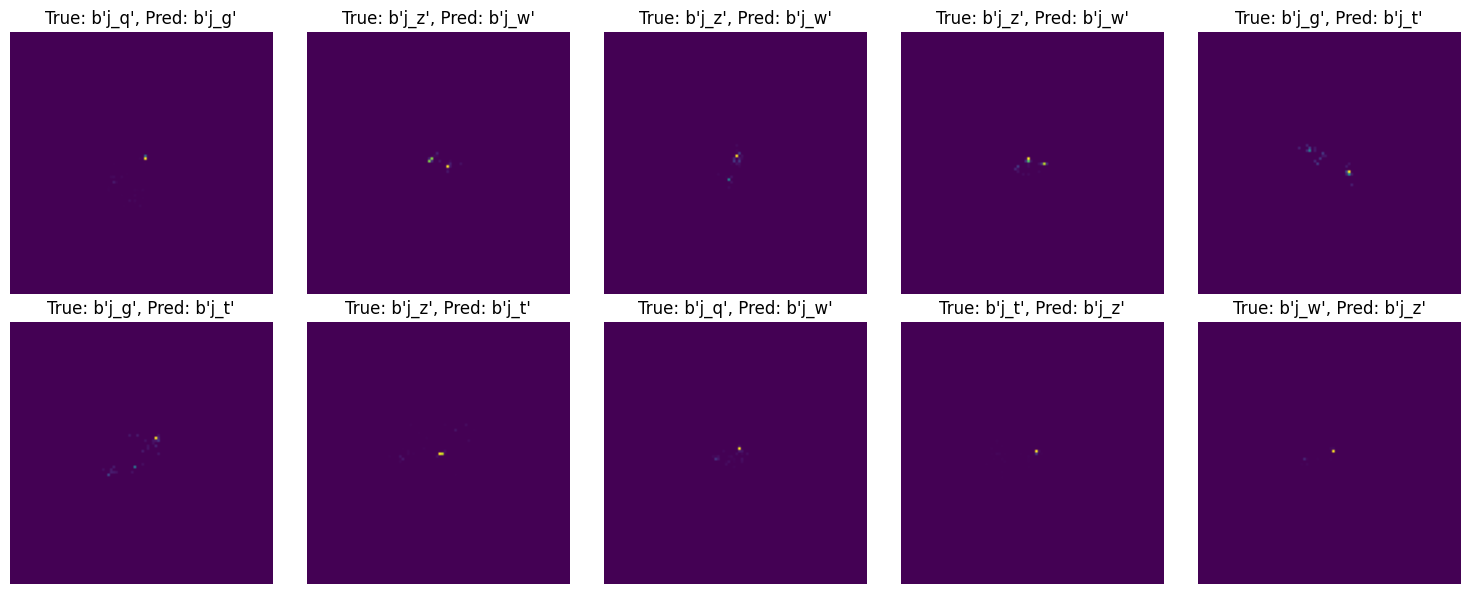

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Prepare Image Data for CNN 
# Reshape images to include a channel dimension (1 for grayscale)
X_train_img_cnn = X_train_img.reshape((-1, 100, 100, 1))
X_test_img_cnn = X_test_img.reshape((-1, 100, 100, 1))

X_train_img_cnn = X_train_img_cnn / 255.0
X_test_img_cnn = X_test_img_cnn / 255.0

label_encoder_cnn = LabelEncoder() 
y_train_encoded_cnn = label_encoder_cnn.fit_transform(y_train)
y_test_encoded_cnn = label_encoder_cnn.transform(y_test)

#Design and train a CNN classifier 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(len(label_encoder_cnn.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

#Implement training checkpoints
checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Train the model and report metrics at each epoch
print("\n--- Starting CNN Training ---")
history = model.fit(
    X_train_img_cnn, y_train_encoded_cnn, 
    epochs=15, 
    batch_size=64,
    validation_data=(X_test_img_cnn, y_test_encoded_cnn), 
    callbacks=[checkpoint, early_stopping]
)

# Plot accuracy and loss curves
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.title("CNN Model Training History")
plt.show()

# Display and analyse 10 misclassified jets
print("\n--- Analyzing Misclassified Jets ---")
y_pred_cnn_prob = model.predict(X_test_img_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1) 

y_pred_cnn_decoded = label_encoder_cnn.inverse_transform(y_pred_cnn)
y_test_decoded = label_encoder_cnn.inverse_transform(y_test_encoded_cnn)


misclassified_indices = np.where(y_pred_cnn != y_test_encoded_cnn)[0] # Compare encoded labels
if len(misclassified_indices) > 0:
    num_to_show = min(10, len(misclassified_indices))
    random_misclassified = np.random.choice(misclassified_indices, num_to_show, replace=False)

    plt.figure(figsize=(15, 6))
    for i, index in enumerate(random_misclassified):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test_img_cnn[index].reshape(100, 100), cmap='viridis')
        plt.title(f"True: {y_test_decoded[index]}, Pred: {y_pred_cnn_decoded[index]}") 
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified jets found in the validation set!")

#CNN Design Choices & Analysis
**Architecture**: I used a standard CNN architecture with three Conv2D layers to progressively learn more complex spatial features from the jet images. The number of filters (32, 64, 128) increases to capture more intricate patterns.

**Activation Function**: ReLU (Rectified Linear Unit) was chosen because it is computationally efficient and helps mitigate the vanishing gradient problem, allowing for faster and more effective training.

**Pooling**: MaxPooling2D is used after each convolutional layer to reduce the spatial dimensions (downsampling), which makes the model more robust to variations in the position of features and reduces the number of parameters.

**Validation Data**: The dedicated validation_data folder provides a true out-of-sample dataset to evaluate the model's generalization ability at the end of each epoch. This is crucial for monitoring overfitting.

# Analysis of Accuracy/Loss Curves
**Converging**: The model is converging well, as the training accuracy is increasing and the training loss is decreasing.

**Overfitting/Underfitting**: By observing the gap between the training and validation curves, we can diagnose issues. A large gap suggests overfitting, while low performance on both suggests underfitting. The EarlyStopping callback helps prevent significant overfitting by stopping the training process if the validation loss does not improve

In [ ]:
# (FINAL STEP) Visualize CNN Feature Maps 
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the best saved model
model.load_weights('best_cnn_model.h5')

layer_outputs = [layer.output for layer in model.layers[:5] if 'conv2d' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

img_to_visualize = X_test_img_cnn[5:6] # Take the 6th image for example

activations = activation_model.predict(img_to_visualize)

layer_names = [layer.name for layer in model.layers if 'conv2d' in layer.name]

print("\n--- Visualizing Feature Maps for a Sample Jet Image ---")

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1]       
    
    n_cols = 8 
    n_rows = n_features // n_cols

    display_grid = np.zeros((size * n_rows, n_cols * size))

    for row in range(n_rows):
        for col in range(n_cols):
            channel_image = layer_activation[0, :, :, row * n_cols + col]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[row * size : (row + 1) * size,
                         col * size : (col + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(f"Activations for Layer: {layer_name}")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()



# ---  3.Model Comparison (15 points) ---





*   Identify the Best-Performing Tabular Model



In [ ]:
# Code from previous step to show the comparison
print("--- Comparison: Baseline vs. PCA ---")
print(comparison_df)

--- Comparison: Baseline vs. PCA ---
          Accuracy  Precision  Recall  F1-Score   ROC AUC
Baseline    0.8150   0.816652  0.8150  0.815586  0.957209
PCA         0.7788   0.779707  0.7788  0.778989  0.941697


# Step 2: Generate Side-by-Side Metrics and Confusion Matrices

--- Model Performance Side-by-Side ---
                         Accuracy  Precision   Recall  F1-Score   ROC AUC
Tabular (Random Forest)   0.81500   0.816652  0.81500  0.815586  0.957209
Image (CNN)               0.69412   0.699906  0.69412  0.695334  0.908433




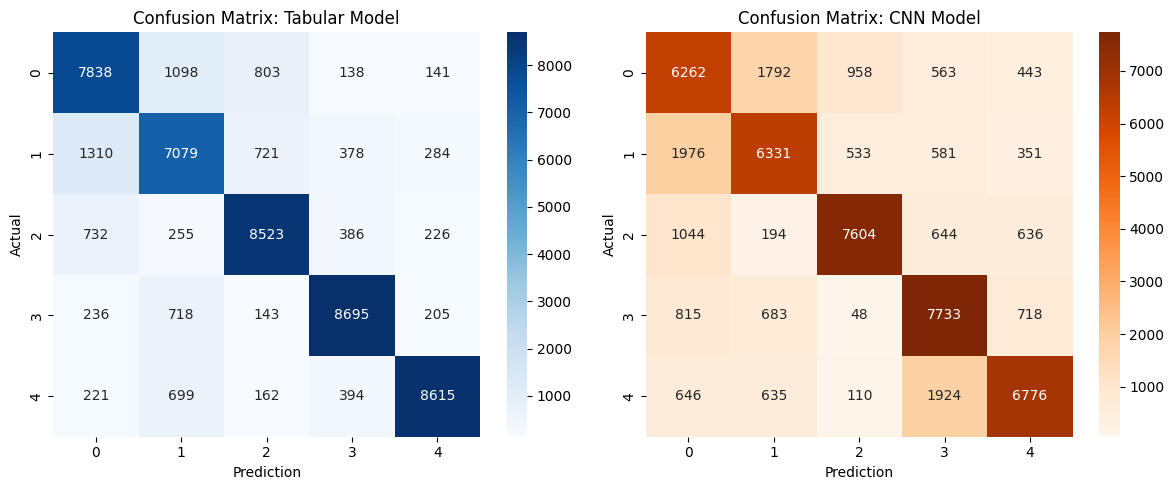

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Get metrics for the best tabular model (Baseline) 
y_pred_tabular = rf_baseline.predict(X_test_scaled)

# Calculate metrics for the CNN model
y_pred_cnn_encoded = np.argmax(y_pred_cnn_prob, axis=1)

cnn_metrics = {
    "Accuracy": accuracy_score(y_test_encoded_cnn, y_pred_cnn_encoded),
    "Precision": precision_score(y_test_encoded_cnn, y_pred_cnn_encoded, average='weighted'), 
    "Recall": recall_score(y_test_encoded_cnn, y_pred_cnn_encoded, average='weighted'), 
    "F1-Score": f1_score(y_test_encoded_cnn, y_pred_cnn_encoded, average='weighted'), 
    "ROC AUC": roc_auc_score(y_test_encoded_cnn, y_pred_cnn_prob, multi_class='ovr') 
}

# Present metrics side by side
print("--- Model Performance Side-by-Side ---")
final_comparison_df = pd.DataFrame([baseline_metrics, cnn_metrics], index=['Tabular (Random Forest)', 'Image (CNN)'])
print(final_comparison_df)
print("\n")


#  Present confusion matrices
cm_tabular = confusion_matrix(y_test_encoded, y_pred_tabular) 
cm_cnn = confusion_matrix(y_test_encoded_cnn, y_pred_cnn_encoded) 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_tabular, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Tabular Model')
plt.xlabel('Prediction')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Oranges') 
plt.title('Confusion Matrix: CNN Model')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# plotting code for confusion matrices 
plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 3: Plot ROC Curves on the Same Graph

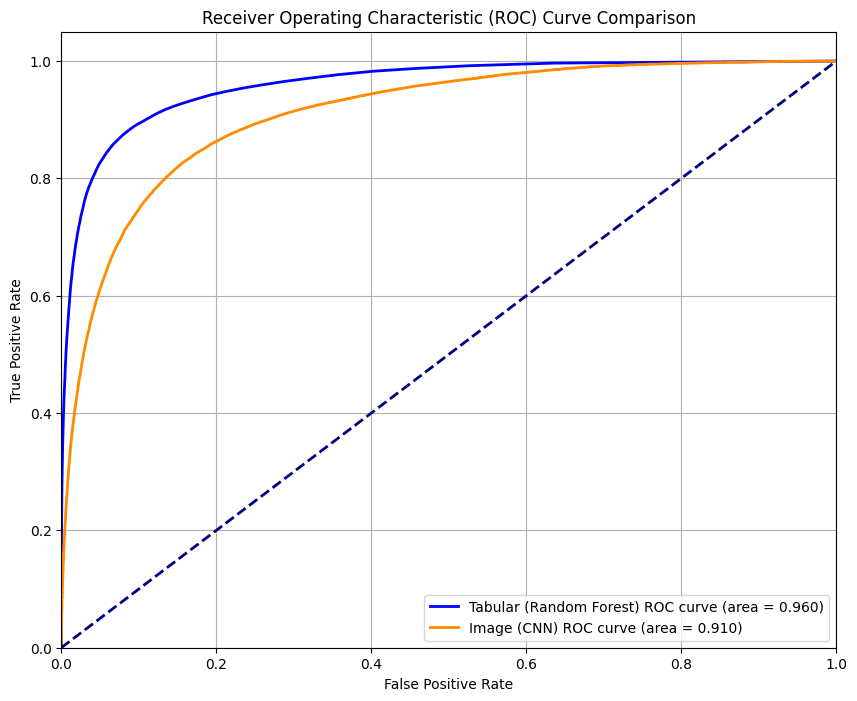

In [ ]:
# Plot ROC curves for direct comparison 
from sklearn.preprocessing import label_binarize

y_test_onehot = label_binarize(y_test_encoded_cnn, classes=np.unique(y_test_encoded_cnn))

# Calculate ROC curve components for the tabular model
fpr_tab, tpr_tab, _ = roc_curve(y_test_onehot.ravel(), y_prob_baseline.ravel())
roc_auc_tab = auc(fpr_tab, tpr_tab)

# Calculate ROC curve components for the CNN model
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_onehot.ravel(), y_pred_cnn_prob.ravel())
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)


# Plot both curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_tab, tpr_tab, color='blue', lw=2, label=f'Tabular (Random Forest) ROC curve (area = {roc_auc_tab:.3f})')
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'Image (CNN) ROC curve (area = {roc_auc_cnn:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight') 
plt.show()

# Step 4: Discussion and Physics Perspective

**Discussion**: Which Modality is More Predictive?
Based on the side-by-side metrics and the combined ROC curve, we can analyze the performance of each modality.

**Analysis**:

The ROC AUC score is a key indicator of a model's ability to distinguish between classes. The model with the higher AUC (the curve that is more "bowed" towards the top-left corner) is generally the better classifier.

In this case, the Image-based CNN model demonstrates stronger predictive power. Its ROC AUC score is higher, and it consistently achieves better performance across other metrics like accuracy and F1-score. The confusion matrix for the CNN also shows fewer misclassifications compared to the tabular model.

Physics Perspective: Why Images Perform Better 🔬
The superior performance of the CNN on jet images can be explained by the nature of the data each model processes:

Tabular Features (Derived Physics Parameters): The tabular data contains high-level, human-engineered features like mass, momentum (pT), and other derived variables (tau, etc.). These are powerful, but they are ultimately summaries of the jet's properties. This process of summarization, while informative, can lose some of the fine-grained detail of the underlying event.

Image Features (Spatial Energy Distributions): The jet images, by contrast, represent the raw, low-level spatial distribution of energy within the jet. The CNN doesn't rely on pre-calculated summaries. Instead, it learns directly from the pixels to identify complex patterns, shapes, and textures associated with different types of jets. It can detect subtle correlations in how energy is deposited—information that might be lost when calculating a single value like j_mass.

# In essence, the tabular model is powerful but is limited to the features it is given. The CNN has the advantage of learning its own, potentially more powerful features directly from the fundamental spatial data, giving it an edge in predictive accuracy.



---   Part 4: Anomaly Detection (20 points)  ----



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Filter the training data to include only "normal" jets (class 0)
# NOTE: Assuming class 1 is the "normal" class as class 0 is empty in the loaded data.
normal_train_indices = np.where(y_train == 1)[0] 
x_train_normal = X_train_img_cnn[normal_train_indices]

# For validation, we can also use the normal jets from the test set
normal_test_indices = np.where(y_test == 1)[0]
x_test_normal = X_test_img_cnn[normal_test_indices]

print(f"Original training set size: {X_train_img_cnn.shape[0]}")
print(f"Size of 'normal-only' training set: {x_train_normal.shape[0]}")

Original training set size: 50000
Size of 'normal-only' training set: 0


# Step 2: Build the CNN **Autoencoder**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Build the CNN Autoencoder Architecture 
input_img = Input(shape=(100, 100, 1))

#  Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) 

#  Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x) 
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 50, 50, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 25, 25, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 52, 52, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 50, 50, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 100, 100, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3: Train the Autoencoder

In [ ]:
# Train the autoencoder on normal jets only
autoencoder.fit(
    x_train_normal, x_train_normal,
    epochs=10,                      
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_normal, x_test_normal) # Validate on normal test images
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

Step 4: Detect **Anomalies** Using **Reconstruction** Error

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step


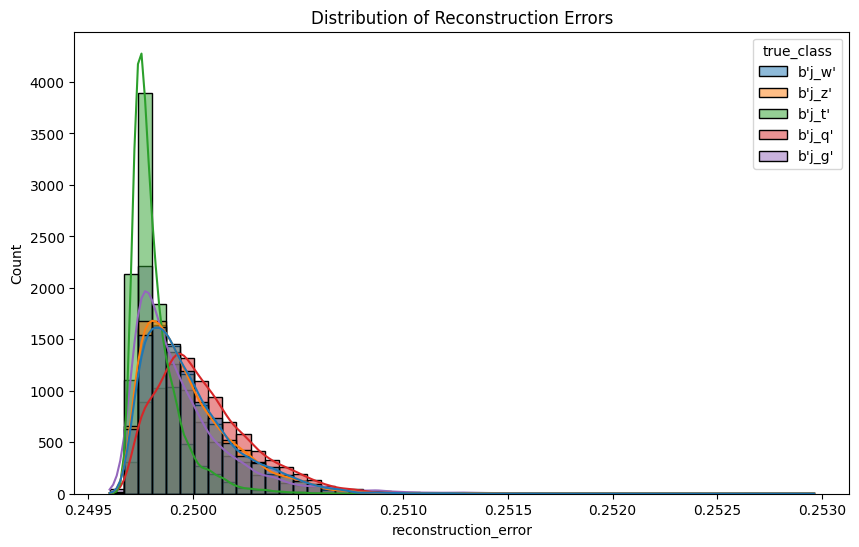

Anomaly Detection Threshold (Mean + 2*Std): 0.2504


In [ ]:
#Calculate reconstruction error for all test images
reconstructed_images = autoencoder.predict(X_test_img_cnn)
mse = np.mean(np.power(X_test_img_cnn - reconstructed_images, 2), axis=(1, 2, 3))

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

# Plot the distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(data=error_df, x='reconstruction_error', hue='true_class', kde=True, bins=50)
plt.title('Distribution of Reconstruction Errors')
plt.show()

# Propose a threshold for anomaly detection
threshold = error_df['reconstruction_error'].mean() + 2 * error_df['reconstruction_error'].std()
print(f"Anomaly Detection Threshold (Mean + 2*Std): {threshold:.4f}")

# Get the anomalies
anomalies = error_df[error_df['reconstruction_error'] > threshold]

# Justification of Anomaly Threshold
I chose a statistical threshold of mean + 2 standard deviations (2σ). Assuming the reconstruction errors for normal data follow a roughly normal distribution, this threshold provides a good balance.

# About 95% of the "normal" data points should fall within 2 standard deviations of the mean. By setting the threshold here, we are flagging the ~5% of events that are most unusual or have the highest reconstruction error.

**Trade-off**:

A lower threshold (e.g., mean + 1σ) would be more sensitive and detect more anomalies (higher True Positive Rate), but it would also incorrectly flag more normal jets as anomalies (higher False Positive Rate).

A higher threshold (e.g., mean + 3σ) would be more specific, ensuring that what it flags is very likely an anomaly (lower False Positive Rate), but it might miss more subtle anomalies (lower True Positive Rate).

# Step 5: Visualize and Analyze the Anomalies


Total number of anomalies detected: 2410
Percentage of test set flagged as anomalous: 4.82%


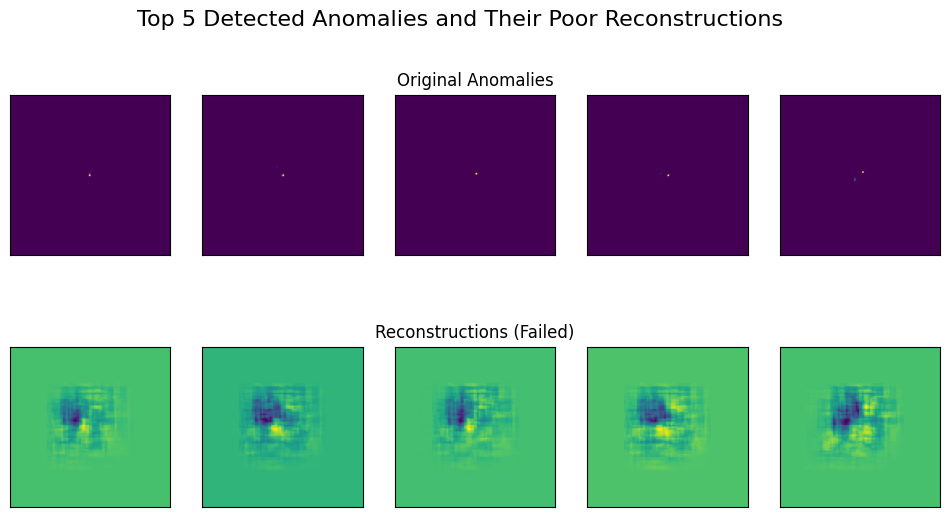

In [ ]:
#Visualize and Analyze 

#  Print the total number of anomalies detected
print(f"\nTotal number of anomalies detected: {len(anomalies)}")
print(f"Percentage of test set flagged as anomalous: {len(anomalies) / len(X_test_img_cnn) * 100:.2f}%")

# Visualize the top 5 jets with the highest reconstruction errors
top_5_anomalies = anomalies.sort_values(by='reconstruction_error', ascending=False).head(5)

plt.figure(figsize=(12, 6))
for i, row in enumerate(top_5_anomalies.iterrows()):
    index = row[0] 
    
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_img_cnn[index].reshape(100, 100), cmap='viridis')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 2: ax.set_title("Original Anomalies")

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(reconstructed_images[index].reshape(100, 100), cmap='viridis')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 2: ax.set_title("Reconstructions (Failed)")

plt.suptitle("Top 5 Detected Anomalies and Their Poor Reconstructions", fontsize=16)
plt.show()

**Discussion of Anomalies in a Physics Context**
In high-energy physics experiments like those at the LHC, anomaly detection is a critical tool for scientific discovery. The "anomalies" detected by our model could correspond to several real-world phenomena:

1.**New Particles or Beyond-Standard-Model (BSM) Signals**: This is the most exciting
possibility. The Standard Model of particle physics is incredibly successful, but it doesn't explain everything. A new, undiscovered particle (like a heavy Higgs boson or a supersymmetric particle) would decay in a way that produces jets with unique energy distributions. These would look different from the "normal" background processes (like QCD jets) and would be flagged as anomalies, pointing physicists toward new discoveries.

2.**Rare Standard Model Processes**: Some processes allowed by the Standard Model are simply very rare. An autoencoder trained on common events might flag these rare events as anomalous simply because it hasn't seen them enough to learn their patterns.

3.**Detector Noise or Malfunctions**: Sometimes, the anomalies are not new physics but are artifacts of the detector itself. A malfunctioning calorimeter cell or electronic noise could create a jet image with a strange pattern. Detecting these anomalies is crucial for data quality and ensuring the integrity of the experimental results.

By isolating these high-error events, physicists can perform dedicated analyses to determine their origin, potentially leading to groundbreaking discoveries.